In [9]:
%matplotlib inline

In [16]:
from datetime import date
import requests
import matplotlib.pyplot as plt
import quandl
import csv
import pandas as pd
import json

In [17]:
today = date.today()
today

datetime.date(2020, 3, 29)

In [18]:
api_key = 'zybYikjW--LEK2vTwkoZ'

In [27]:
#query url sample- GET https://www.quandl.com/api/v3/datasets/{database_code}/{dataset_code}/data.{return_format}
# output - 'https://www.quandl.com/api/v3/datasets/wiki/fb/data.json?api_key=zybYikjW--LEK2vTwkoZ'
url = 'https://www.quandl.com/api/v3/datasets/'
database_code = 'wiki'
dataset_code = 'FB'
return_format = 'json'

In [28]:
sample_query_url = url + database_code + '/' + dataset_code + '/data.' + return_format + '?api_key=' + api_key
sample_query_url

'https://www.quandl.com/api/v3/datasets/wiki/FB/data.json?api_key=zybYikjW--LEK2vTwkoZ'

In [44]:
sample_response = requests.get(query_url)
sample_response

<Response [200]>

In [128]:
content = sample_response.json()
content
# type(content)

{'dataset_data': {'limit': None,
  'transform': None,
  'column_index': None,
  'column_names': ['Date',
   'Open',
   'High',
   'Low',
   'Close',
   'Volume',
   'Ex-Dividend',
   'Split Ratio',
   'Adj. Open',
   'Adj. High',
   'Adj. Low',
   'Adj. Close',
   'Adj. Volume'],
  'start_date': '2012-05-18',
  'end_date': '2018-03-27',
  'frequency': 'daily',
  'data': [['2018-03-27',
    156.31,
    162.85,
    150.75,
    152.19,
    76787884.0,
    0.0,
    1.0,
    156.31,
    162.85,
    150.75,
    152.19,
    76787884.0],
   ['2018-03-26',
    160.82,
    161.1,
    149.02,
    160.06,
    125438294.0,
    0.0,
    1.0,
    160.82,
    161.1,
    149.02,
    160.06,
    125438294.0],
   ['2018-03-23',
    165.44,
    167.1,
    159.02,
    159.39,
    52306891.0,
    0.0,
    1.0,
    165.44,
    167.1,
    159.02,
    159.39,
    52306891.0],
   ['2018-03-22',
    166.13,
    170.27,
    163.72,
    164.89,
    73389988.0,
    0.0,
    1.0,
    166.13,
    170.27,
    163.72,


In [132]:
df = pd.DataFrame(content['dataset_data']['data'], columns=content['dataset_data']['column_names'])
df

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
0,2018-03-27,156.31,162.85,150.75,152.1900,76787884.0,0.0,1.0,156.31,162.85,150.75,152.1900,76787884.0
1,2018-03-26,160.82,161.10,149.02,160.0600,125438294.0,0.0,1.0,160.82,161.10,149.02,160.0600,125438294.0
2,2018-03-23,165.44,167.10,159.02,159.3900,52306891.0,0.0,1.0,165.44,167.10,159.02,159.3900,52306891.0
3,2018-03-22,166.13,170.27,163.72,164.8900,73389988.0,0.0,1.0,166.13,170.27,163.72,164.8900,73389988.0
4,2018-03-21,164.80,173.40,163.30,169.3900,105350867.0,0.0,1.0,164.80,173.40,163.30,169.3900,105350867.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1467,2012-05-24,32.95,33.21,31.77,33.0300,50237200.0,0.0,1.0,32.95,33.21,31.77,33.0300,50237200.0
1468,2012-05-23,31.37,32.50,31.36,32.0000,73600000.0,0.0,1.0,31.37,32.50,31.36,32.0000,73600000.0
1469,2012-05-22,32.61,33.59,30.94,31.0000,101786600.0,0.0,1.0,32.61,33.59,30.94,31.0000,101786600.0
1470,2012-05-21,36.53,36.66,33.00,34.0300,168192700.0,0.0,1.0,36.53,36.66,33.00,34.0300,168192700.0


In [105]:
dataset_data = content['dataset_data']
column_names = dataset_data['column_names']
column_names

['Date',
 'Open',
 'High',
 'Low',
 'Close',
 'Volume',
 'Ex-Dividend',
 'Split Ratio',
 'Adj. Open',
 'Adj. High',
 'Adj. Low',
 'Adj. Close',
 'Adj. Volume']

In [106]:
data = dataset_data['data']
data

[['2018-03-27',
  156.31,
  162.85,
  150.75,
  152.19,
  76787884.0,
  0.0,
  1.0,
  156.31,
  162.85,
  150.75,
  152.19,
  76787884.0],
 ['2018-03-26',
  160.82,
  161.1,
  149.02,
  160.06,
  125438294.0,
  0.0,
  1.0,
  160.82,
  161.1,
  149.02,
  160.06,
  125438294.0],
 ['2018-03-23',
  165.44,
  167.1,
  159.02,
  159.39,
  52306891.0,
  0.0,
  1.0,
  165.44,
  167.1,
  159.02,
  159.39,
  52306891.0],
 ['2018-03-22',
  166.13,
  170.27,
  163.72,
  164.89,
  73389988.0,
  0.0,
  1.0,
  166.13,
  170.27,
  163.72,
  164.89,
  73389988.0],
 ['2018-03-21',
  164.8,
  173.4,
  163.3,
  169.39,
  105350867.0,
  0.0,
  1.0,
  164.8,
  173.4,
  163.3,
  169.39,
  105350867.0],
 ['2018-03-20',
  167.47,
  170.2,
  161.95,
  168.15,
  128925534.0,
  0.0,
  1.0,
  167.47,
  170.2,
  161.95,
  168.15,
  128925534.0],
 ['2018-03-19',
  177.01,
  177.17,
  170.06,
  172.56,
  86897749.0,
  0.0,
  1.0,
  177.01,
  177.17,
  170.06,
  172.56,
  86897749.0],
 ['2018-03-16',
  184.49,
  185.3

In [109]:
df = pd.DataFrame(data, columns=column_names )
df

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
0,2018-03-27,156.31,162.85,150.75,152.1900,76787884.0,0.0,1.0,156.31,162.85,150.75,152.1900,76787884.0
1,2018-03-26,160.82,161.10,149.02,160.0600,125438294.0,0.0,1.0,160.82,161.10,149.02,160.0600,125438294.0
2,2018-03-23,165.44,167.10,159.02,159.3900,52306891.0,0.0,1.0,165.44,167.10,159.02,159.3900,52306891.0
3,2018-03-22,166.13,170.27,163.72,164.8900,73389988.0,0.0,1.0,166.13,170.27,163.72,164.8900,73389988.0
4,2018-03-21,164.80,173.40,163.30,169.3900,105350867.0,0.0,1.0,164.80,173.40,163.30,169.3900,105350867.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1467,2012-05-24,32.95,33.21,31.77,33.0300,50237200.0,0.0,1.0,32.95,33.21,31.77,33.0300,50237200.0
1468,2012-05-23,31.37,32.50,31.36,32.0000,73600000.0,0.0,1.0,31.37,32.50,31.36,32.0000,73600000.0
1469,2012-05-22,32.61,33.59,30.94,31.0000,101786600.0,0.0,1.0,32.61,33.59,30.94,31.0000,101786600.0
1470,2012-05-21,36.53,36.66,33.00,34.0300,168192700.0,0.0,1.0,36.53,36.66,33.00,34.0300,168192700.0


In [110]:
request = requests.get('https://s3.amazonaws.com/quandl-production-static/zillow/indicators.csv')
requestStatus = request
requestStatus

<Response [200]>

In [111]:
requestText = request.text
requestText

'INDICATOR|CODE\nAge of Inventory (Public)|AOIP\nBuyer Seller Index|BSI\nDays on Zillow (Public)|DOZP\nHome Sales (NSA)|SALES\nHome Sales (SA)|SASALES\nHome Sold As Foreclosure - Ratio - All Homes|HSAFRAL\nInventory Measure (Public)|IMP\nInventory Measure - SSA (Public)|IMSP\nInventory Measure - Tiers (Public)|IMTP\nListings Price Cuts (SA) All Homes|LPCSAL\nListings Price Cuts (SA) Bottom Tier|LPCSBT\nListings Price Cuts (SA) Condominiums|LPCSCO\nListings Price Cuts (SA) Middle Tier|LPCSMT\nListings Price Cuts (SA) Single-Family Residence|LPCSSF\nListings Price Cuts (SA) Top Tier|LPCSTT\nMarket Health Index|MHI\nMedian Listing Price - All Homes|MLPAH\nMedian Listing Price - Condo/Co-op|MLPCC\nMedian Listing Price - Duplex/Triplex|MLPDT\nMedian Listing Price - Five Or More Bedrooms|MLP5B\nMedian Listing Price - Four Bedrooms|MLP4B\nMedian Listing Price - One Bedroom|MLP1B\nMedian Listing Price - Single-Family Residence|MLPSF\nMedian Listing Price - Three Bedrooms|MLP3B\nMedian Listing 

In [135]:
df = pd.read_csv('https://s3.amazonaws.com/quandl-production-static/zillow/indicators.csv', delimiter='|')
df
# dfCodes = df['CODE']
# dfCodes

,INDICATOR,CODE
0,Age of Inventory (Public),AOIP
1,Buyer Seller Index,BSI
2,Days on Zillow (Public),DOZP
3,Home Sales (NSA),SALES
4,Home Sales (SA),SASALES
...,...,...
101,Zillow Rental Index - Multi-Family Residence S...,ZRIMFRRS
102,Zillow Rental Index - Multi-Family Residence,ZRIMFRR
103,Zillow Rental Index - Single-Family Residence ...,ZRISFRRS
104,Zillow Rental Index - Single-Family Residence,ZRISFRR


In [138]:
df.loc[df['CODE'] == "BSI"]

,INDICATOR,CODE
1,Buyer Seller Index,BSI


In [145]:
codes_df=pd.DataFrame(df['CODE'])
codes_df

,CODE
0,AOIP
1,BSI
2,DOZP
3,SALES
4,SASALES
...,...
101,ZRIMFRRS
102,ZRIMFRR
103,ZRISFRRS
104,ZRISFRR


In [122]:
#Zillow query url sample- GET https://www.quandl.com/api/v3/datasets/ZILL/{AREA_CATEGORY}{AREA_CODE}_{INDICATOR_CODE}
# output - http://www.quandl.com/api/v3/datasets/ZILL/S00022_A.csv
url = 'https://www.quandl.com/api/v3/datasets/'
AREA_CATEGORY = 'ZILLOW'
AREA_CODE = 'Z98005' #Z-zipcode
INDICATOR_CODE= 'MLPFSF' #https://s3.amazonaws.com/quandl-production-static/zillow/indicators.csv

In [123]:
query = AREA_CATEGORY + '/' + AREA_CODE + '_' + INDICATOR_CODE 
query

'ZILLOW/Z98005_MLPFSF'

In [124]:
quandl.ApiConfig.api_key = api_key
# quandl.get(AREA_CATEGORY + '/' + AREA_CODE + '_' + INDICATOR_CODE)
data = quandl.get(query)
data

,Value
Date,
2018-03-31,499.111224
2018-04-30,459.882583
2018-05-31,510.332149
2018-06-30,515.850144
2018-07-31,519.185735
2018-08-31,512.531969
2018-09-30,486.628337
2018-10-31,503.481635
2018-11-30,505.617978


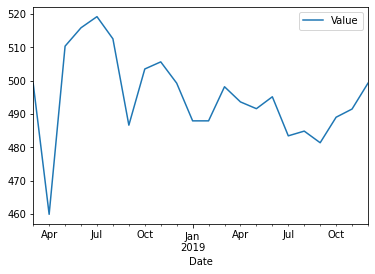

In [125]:
data.plot()